# Imports

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import os
from statsmodels.stats.outliers_influence import variance_inflation_factor

# train_path = r'Users/lucywilliams/Downloads/tabular-playground-series-aug-2021/train.csv'
train_path = r'D:/KaggleTabular/August/train.csv'

In [5]:
train = pd.read_csv(train_path, index_col=0)

In [6]:
train

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f91,f92,f93,f94,f95,f96,f97,f98,f99,loss
id,,,,,,,,,,,,,,,,,,,,,
0,-0.002350,59,0.766739,-1.350460,42.27270,16.68570,30.35990,1.267300,0.392007,1.09101,...,-42.43990,26.854000,1.45751,0.696161,0.941764,1.828470,0.924090,2.296580,10.489800,15
1,0.784462,145,-0.463845,-0.530421,27324.90000,3.47545,160.49800,0.828007,3.735860,1.28138,...,-184.13200,7.901370,1.70644,-0.494699,-2.058300,0.819184,0.439152,2.364700,1.143830,3
2,0.317816,19,-0.432571,-0.382644,1383.26000,19.71290,31.10260,-0.515354,34.430800,1.24210,...,7.43721,37.218100,3.25339,0.337934,0.615037,2.216760,0.745268,1.696790,12.305500,6
3,0.210753,17,-0.616454,0.946362,-119.25300,4.08235,185.25700,1.383310,-47.521400,1.09130,...,9.66778,0.626942,1.49425,0.517513,-10.222100,2.627310,0.617270,1.456450,10.028800,2
4,0.439671,20,0.968126,-0.092546,74.30200,12.30650,72.18600,-0.233964,24.399100,1.10151,...,290.65700,15.604300,1.73557,-0.476668,1.390190,2.195740,0.826987,1.784850,7.071970,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,0.923980,6,0.663212,-0.055120,6.61768,1.26619,40.44790,0.852375,25.522400,1.12294,...,3517.97000,18.534200,1.41936,0.607504,4.950780,2.853420,0.961882,1.068010,1.437650,11
249996,0.243556,7,-0.557062,1.333470,-54.88610,17.58310,212.96400,-1.204750,-128.385000,1.19334,...,1945.81000,19.482200,1.60072,-0.154877,5.693280,1.994540,0.760925,1.427880,1.226720,5
249997,0.046023,53,0.462863,0.704034,2062.94000,14.58160,11.42710,-0.509812,80.818000,1.20383,...,-28.46890,11.008200,1.61080,-0.350927,27.986900,1.012690,0.830533,1.005470,0.455332,1


In [8]:
X = train.drop(["loss"], axis = 1)
y = train.loss

In [9]:
%%time
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

In [10]:
vif[round(vif.VIF) == 1].sort_values(by = "VIF")

,VIF,variable
9,0.864459,f9
64,0.872415,f64
79,0.879373,f79
12,0.914368,f12
34,0.923462,f34
...,...,...
10,1.008380,f10
52,1.008440,f52
2,1.008804,f2
48,1.010155,f48


In [11]:
vif[vif.VIF > 1.01].sort_values(by = 'VIF', ascending = False)

,VIF,variable
60,3.911184,f60
37,1.011036,f37
48,1.010155,f48


# VIF Tuning

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer

from lightgbm import LGBMRegressor

from imblearn.over_sampling import SMOTEN
from imblearn.pipeline import make_pipeline

import seaborn as sns
import matplotlib.pyplot as plt
import gc

sns.set_style('darkgrid')
%matplotlib inline
rs = 69420
# train_path = r'Users/lucywilliams/Downloads/tabular-playground-series-aug-2021/train.csv'
train_path = r'D:/KaggleTabular/August/train.csv'

In [2]:
train = pd.read_csv(train_path, index_col=0)
y = train.loss
X = train.drop(["loss"], axis = 1)

X.shape, y.shape

((250000, 100), (250000,))

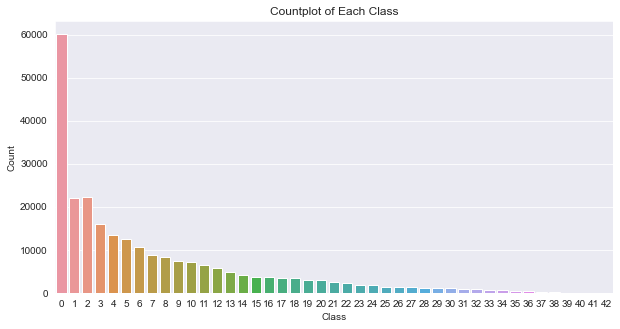

In [3]:
plt.figure(figsize=(10,5))
sns.countplot(x=y)
plt.title("Countplot of Each Class")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [4]:
# from collections import Counter


# def plot_resampling(X, y, sampler, ax):
#     """Plot the resampled dataset using the sampler."""
#     X_res, y_res = sampler.fit_resample(X, y)
#     ax.scatter(X_res[:, 0], X_res[:, 1], c=y_res, alpha=0.8, edgecolor="k")
#     sns.despine(ax=ax, offset=10)
#     ax.set_title(f"Decision function for {sampler.__class__.__name__}")
#     return Counter(y_res)

# import numpy as np


# def plot_decision_function(X, y, clf, ax):
#     """Plot the decision function of the classifier and the original data"""
#     plot_step = 0.02
#     x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
#     y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
#     xx, yy = np.meshgrid(
#         np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
#     )

#     Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
#     Z = Z.reshape(xx.shape)
#     ax.contourf(xx, yy, Z, alpha=0.4)
#     ax.scatter(X[:, 0], X[:, 1], alpha=0.8, c=y, edgecolor="k")
#     ax.set_title(f"Resampling using {clf[0].__class__.__name__}")

In [5]:
# This will take hours and atleast 13GB RAM

# %%time
# from imblearn.over_sampling import SMOTE
# from imblearn.combine import SMOTEENN, SMOTETomek
# from imblearn.pipeline import make_pipeline
# from sklearn.svm import LinearSVC

# samplers = [
#     SMOTE(random_state=0, n_jobs=-1, k_neighbors=2),
# #     SMOTEENN(random_state=0, n_jobs=-1),
# #     SMOTETomek(random_state=0, n_jobs=-1)
# ]

# fig, axs = plt.subplots(3, 2, figsize=(15, 25))
# for ax, sampler in zip(axs, samplers):
#     clf = make_pipeline(sampler, LinearSVC()).fit(X, y)
#     plot_decision_function(X, y, clf, ax[0])
#     plot_resampling(X, y, sampler, ax[1])
# fig.tight_layout()

# plt.show()

## Baseline Model

In [6]:
pipe = make_pipeline(
    RobustScaler(),
    LGBMRegressor(objective='rmse', random_state=rs)
)

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_score = make_scorer(
    rmse,
    greater_is_better=False
)

cv = KFold(n_splits=10, shuffle=True, random_state=rs)

In [7]:
%%time
cv_scores = cross_val_score(
    pipe,
    X, y,
    scoring=rmse_score,
    cv=cv
)

Wall time: 36.6 s


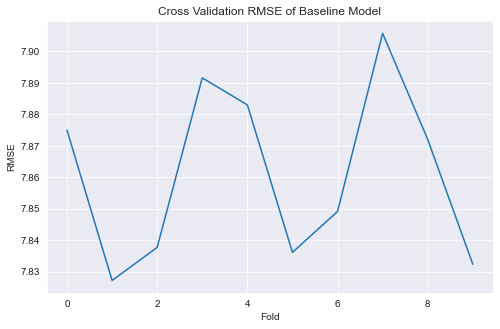

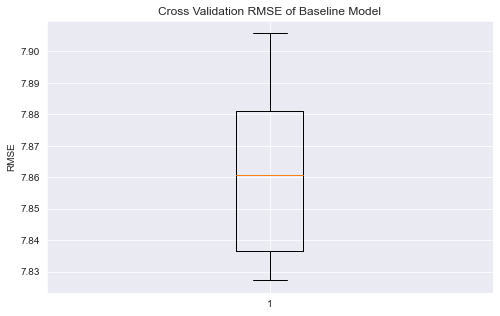

Mean RMSE: 7.86099, STD RMSE: 0.02646


In [8]:
plt.figure(figsize=(8, 5))
plt.plot(-cv_scores)
plt.title('Cross Validation RMSE of Baseline Model')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.show()

plt.figure(figsize=(8, 5))
plt.boxplot(-cv_scores)
plt.title('Cross Validation RMSE of Baseline Model')
plt.ylabel('RMSE')
plt.show()

print(f"Mean RMSE: {round(np.mean(-cv_scores), 5)}, STD RMSE: {round(np.std(-cv_scores), 5)}")

## Automated VIF Tuning

Next steps would be to optimise the threshold for the dropped variables

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor    

def calculate_vif_(X, thresh=3.0):
    
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix) for ix in range(X.iloc[:, variables].shape[1])]
        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X.columns[variables])
    return X.iloc[:, variables]

In [15]:
%%time
new_df = calculate_vif_(X)

dropping 'f60' at index: 60
dropping 'f64' at index: 63
dropping 'f9' at index: 9
dropping 'f79' at index: 76
dropping 'f12' at index: 11
dropping 'f34' at index: 32
dropping 'f30' at index: 28
dropping 'f26' at index: 24
dropping 'f58' at index: 53
dropping 'f53' at index: 48
dropping 'f85' at index: 75
dropping 'f78' at index: 69
dropping 'f73' at index: 64
dropping 'f80' at index: 68
dropping 'f96' at index: 82
dropping 'f50' at index: 45
dropping 'f31' at index: 27
dropping 'f84' at index: 69
dropping 'f98' at index: 80
dropping 'f97' at index: 79
dropping 'f43' at index: 37
dropping 'f93' at index: 75
dropping 'f57' at index: 48
dropping 'f66' at index: 53
dropping 'f65' at index: 52
dropping 'f63' at index: 51
dropping 'f29' at index: 26
dropping 'f72' at index: 55
dropping 'f82' at index: 60
dropping 'f23' at index: 21
dropping 'f46' at index: 37
dropping 'f88' at index: 61
dropping 'f41' at index: 33
dropping 'f61' at index: 45
dropping 'f25' at index: 22
dropping 'f74' at inde

In [16]:
new_cols = new_df.columns
new_cols

Index(['f1', 'f2', 'f3', 'f4', 'f6', 'f7', 'f8', 'f10', 'f11', 'f13', 'f14',
       'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f22', 'f24', 'f27', 'f28',
       'f32', 'f33', 'f35', 'f37', 'f38', 'f39', 'f40', 'f44', 'f45', 'f48',
       'f49', 'f51', 'f52', 'f54', 'f55', 'f56', 'f59', 'f67', 'f68', 'f69',
       'f71', 'f75', 'f76', 'f77', 'f81', 'f83', 'f86', 'f87', 'f89', 'f90',
       'f91', 'f94', 'f95', 'f99'],
      dtype='object')

In [20]:
%%time
cv_scores = cross_val_score(
    pipe,
    new_df.values, y,
    scoring=rmse_score,
    cv=cv
)

Wall time: 19.9 s


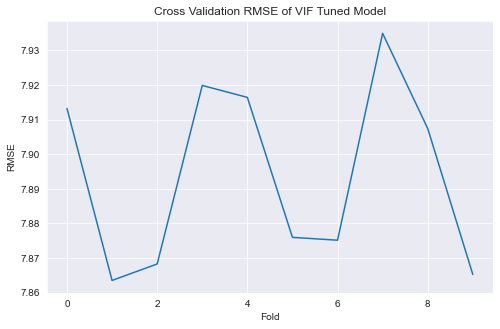

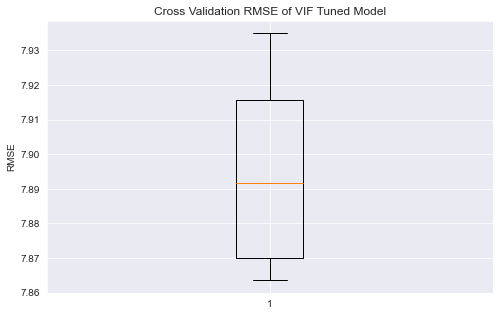

Mean RMSE: 7.89401, STD RMSE: 0.02549


In [21]:
plt.figure(figsize=(8, 5))
plt.plot(-cv_scores)
plt.title('Cross Validation RMSE of VIF Tuned Model')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.show()

plt.figure(figsize=(8, 5))
plt.boxplot(-cv_scores)
plt.title('Cross Validation RMSE of VIF Tuned Model')
plt.ylabel('RMSE')
plt.show()

print(f"Mean RMSE: {round(np.mean(-cv_scores), 5)}, STD RMSE: {round(np.std(-cv_scores), 5)}")

In [22]:
# import time
# from IPython.core.display import display, Javascript
# display(Javascript('IPython.notebook.save_checkpoint();'))
# time.sleep(10)

# import os
# os.system("shutdown /s /t 1")